In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
dataset_df = pd.read_csv('../../case data/hose-price-prediction/train.csv',index_col='Id',na_filter=True)
dataset = np.genfromtxt('../../case data/hose-price-prediction/train.csv',delimiter=',',skip_header=True)
dataset

array([[1.00000e+00, 6.00000e+01,         nan, ...,         nan,
                nan, 2.08500e+05],
       [2.00000e+00, 2.00000e+01,         nan, ...,         nan,
                nan, 1.81500e+05],
       [3.00000e+00, 6.00000e+01,         nan, ...,         nan,
                nan, 2.23500e+05],
       ...,
       [1.45800e+03, 7.00000e+01,         nan, ...,         nan,
                nan, 2.66500e+05],
       [1.45900e+03, 2.00000e+01,         nan, ...,         nan,
                nan, 1.42125e+05],
       [1.46000e+03, 2.00000e+01,         nan, ...,         nan,
                nan, 1.47500e+05]])

In [3]:
import sys
sys.getrecursionlimit()

3000

In [8]:
dataset_df.select_dtypes(include=np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [9]:
dataset_df.select_dtypes(include=np.number).isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [5]:
subset = dataset_df[['LotArea','GrLivArea','SalePrice']]
subset.sort_values(by='LotArea')

,LotArea,GrLivArea,SalePrice
Id,,,
957,1300,1229,124000
1040,1477,630,80000
615,1491,630,75500
490,1526,630,86000
1450,1533,630,92000
...,...,...,...
452,70761,1533,280000
707,115149,1824,302000
250,159000,2144,277000


In [18]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset[['LotArea','GrLivArea']],subset['SalePrice'],test_size=0.3,random_state=42)

In [22]:
train = pd.concat([train_x,train_y],axis=1)
train

,LotArea,GrLivArea,SalePrice
Id,,,
136,10400,1682,174000
1453,3675,1072,145000
763,8640,1547,215200
933,11670,1905,320000
436,10667,1661,212000
...,...,...,...
1096,9317,1314,176432
1131,7804,1981,135000
1295,8172,864,115000


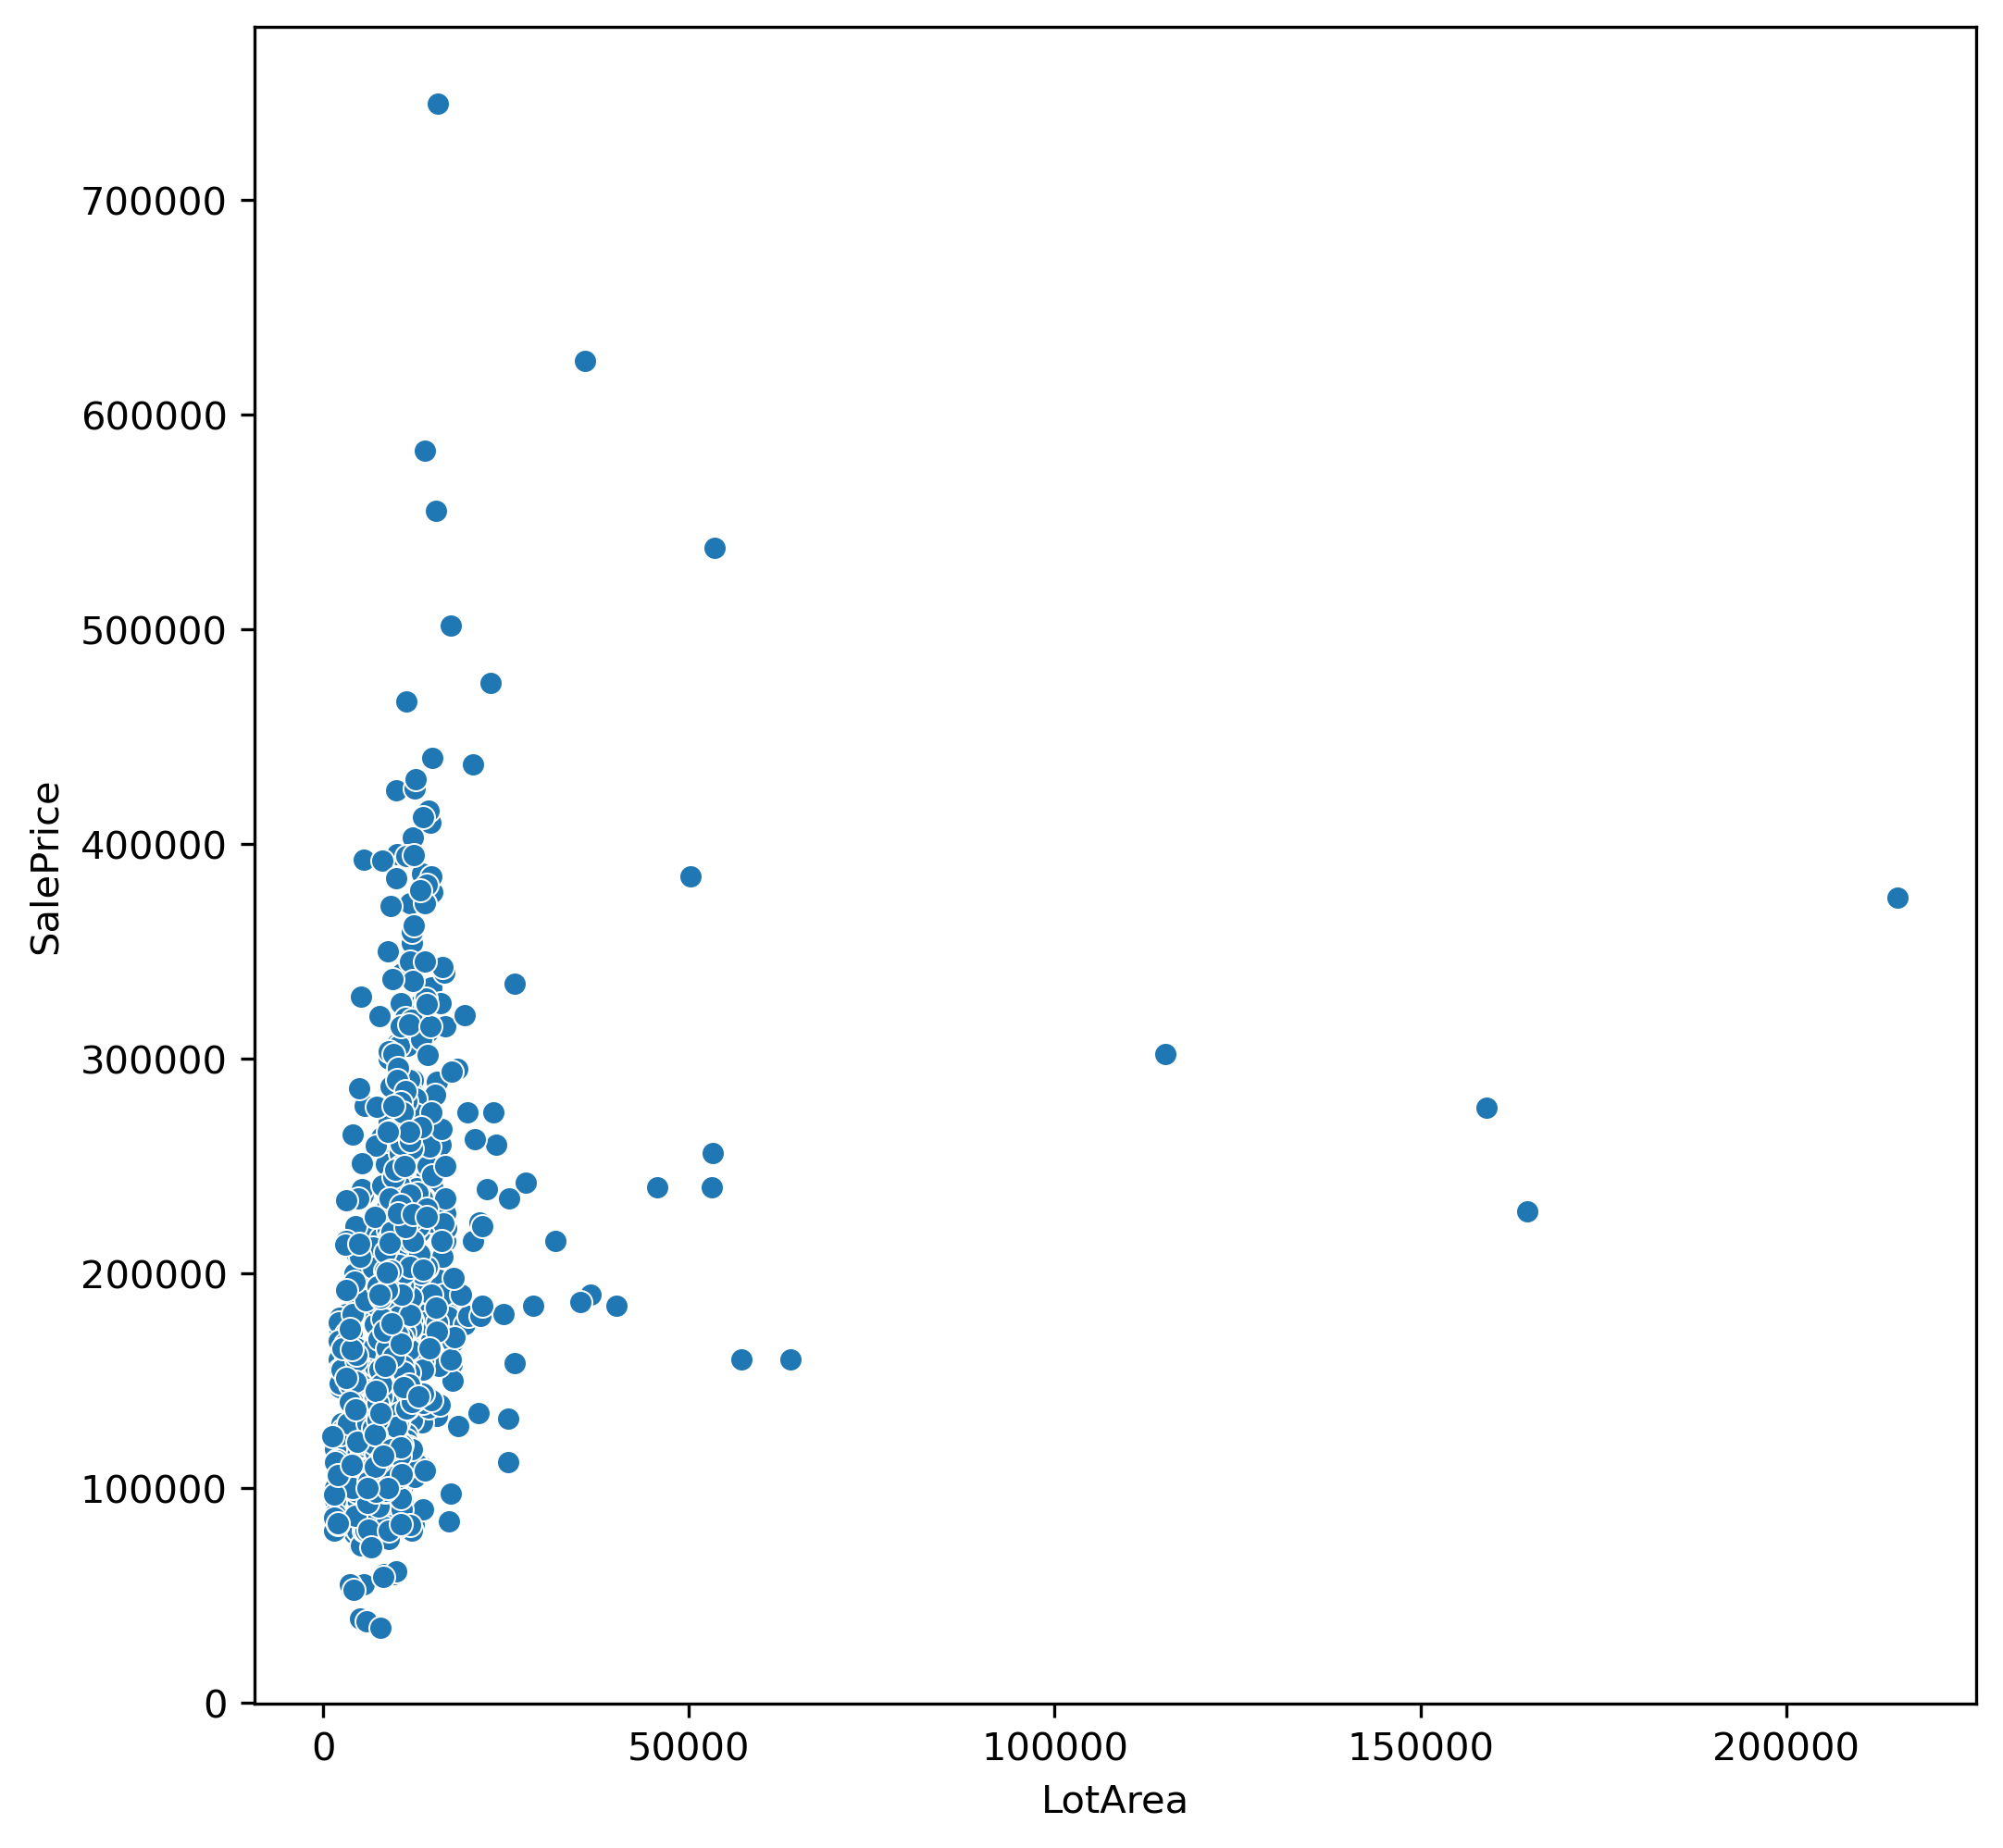

In [9]:
plt.figure(figsize=[8,8],dpi=300)
sns.scatterplot(x='LotArea',y='SalePrice',data=train)
plt.show()

In [10]:
import regression_model as reg
model = reg.TreeBuilder(train,'LotArea','SalePrice',4,35)
tree = model.builder(data=train)

In [40]:
model_mf = reg.TreeBuilderMF(train,['LotArea','GrLivArea'],'SalePrice',2,20)
tree_mf = model_mf.builder(train)

In [11]:
import pprint
pprint.pprint(tree)

{'left': {'left': {'left': 96352.94117647059,
                   'node': 1989.0,
                   'right': {'left': {'left': {'left': 146605.88235294117,
                                               'node': 2627.25,
                                               'right': 175115.7894736842},
                                      'node': 3306.5,
                                      'right': {'left': {'left': 149860.3125,
                                                         'node': 4022.0,
                                                         'right': 131102.63157894736},
                                                'node': 4498.25,
                                                'right': {'left': 166906.0,
                                                          'node': 4981.75,
                                                          'right': 157995.45454545456}}},
                             'node': 5670.0,
                             'right': {'left': {'left': 11037

In [41]:
import json

with open('./tree_mf.json','w') as out:
    json.dump(tree_mf,out)

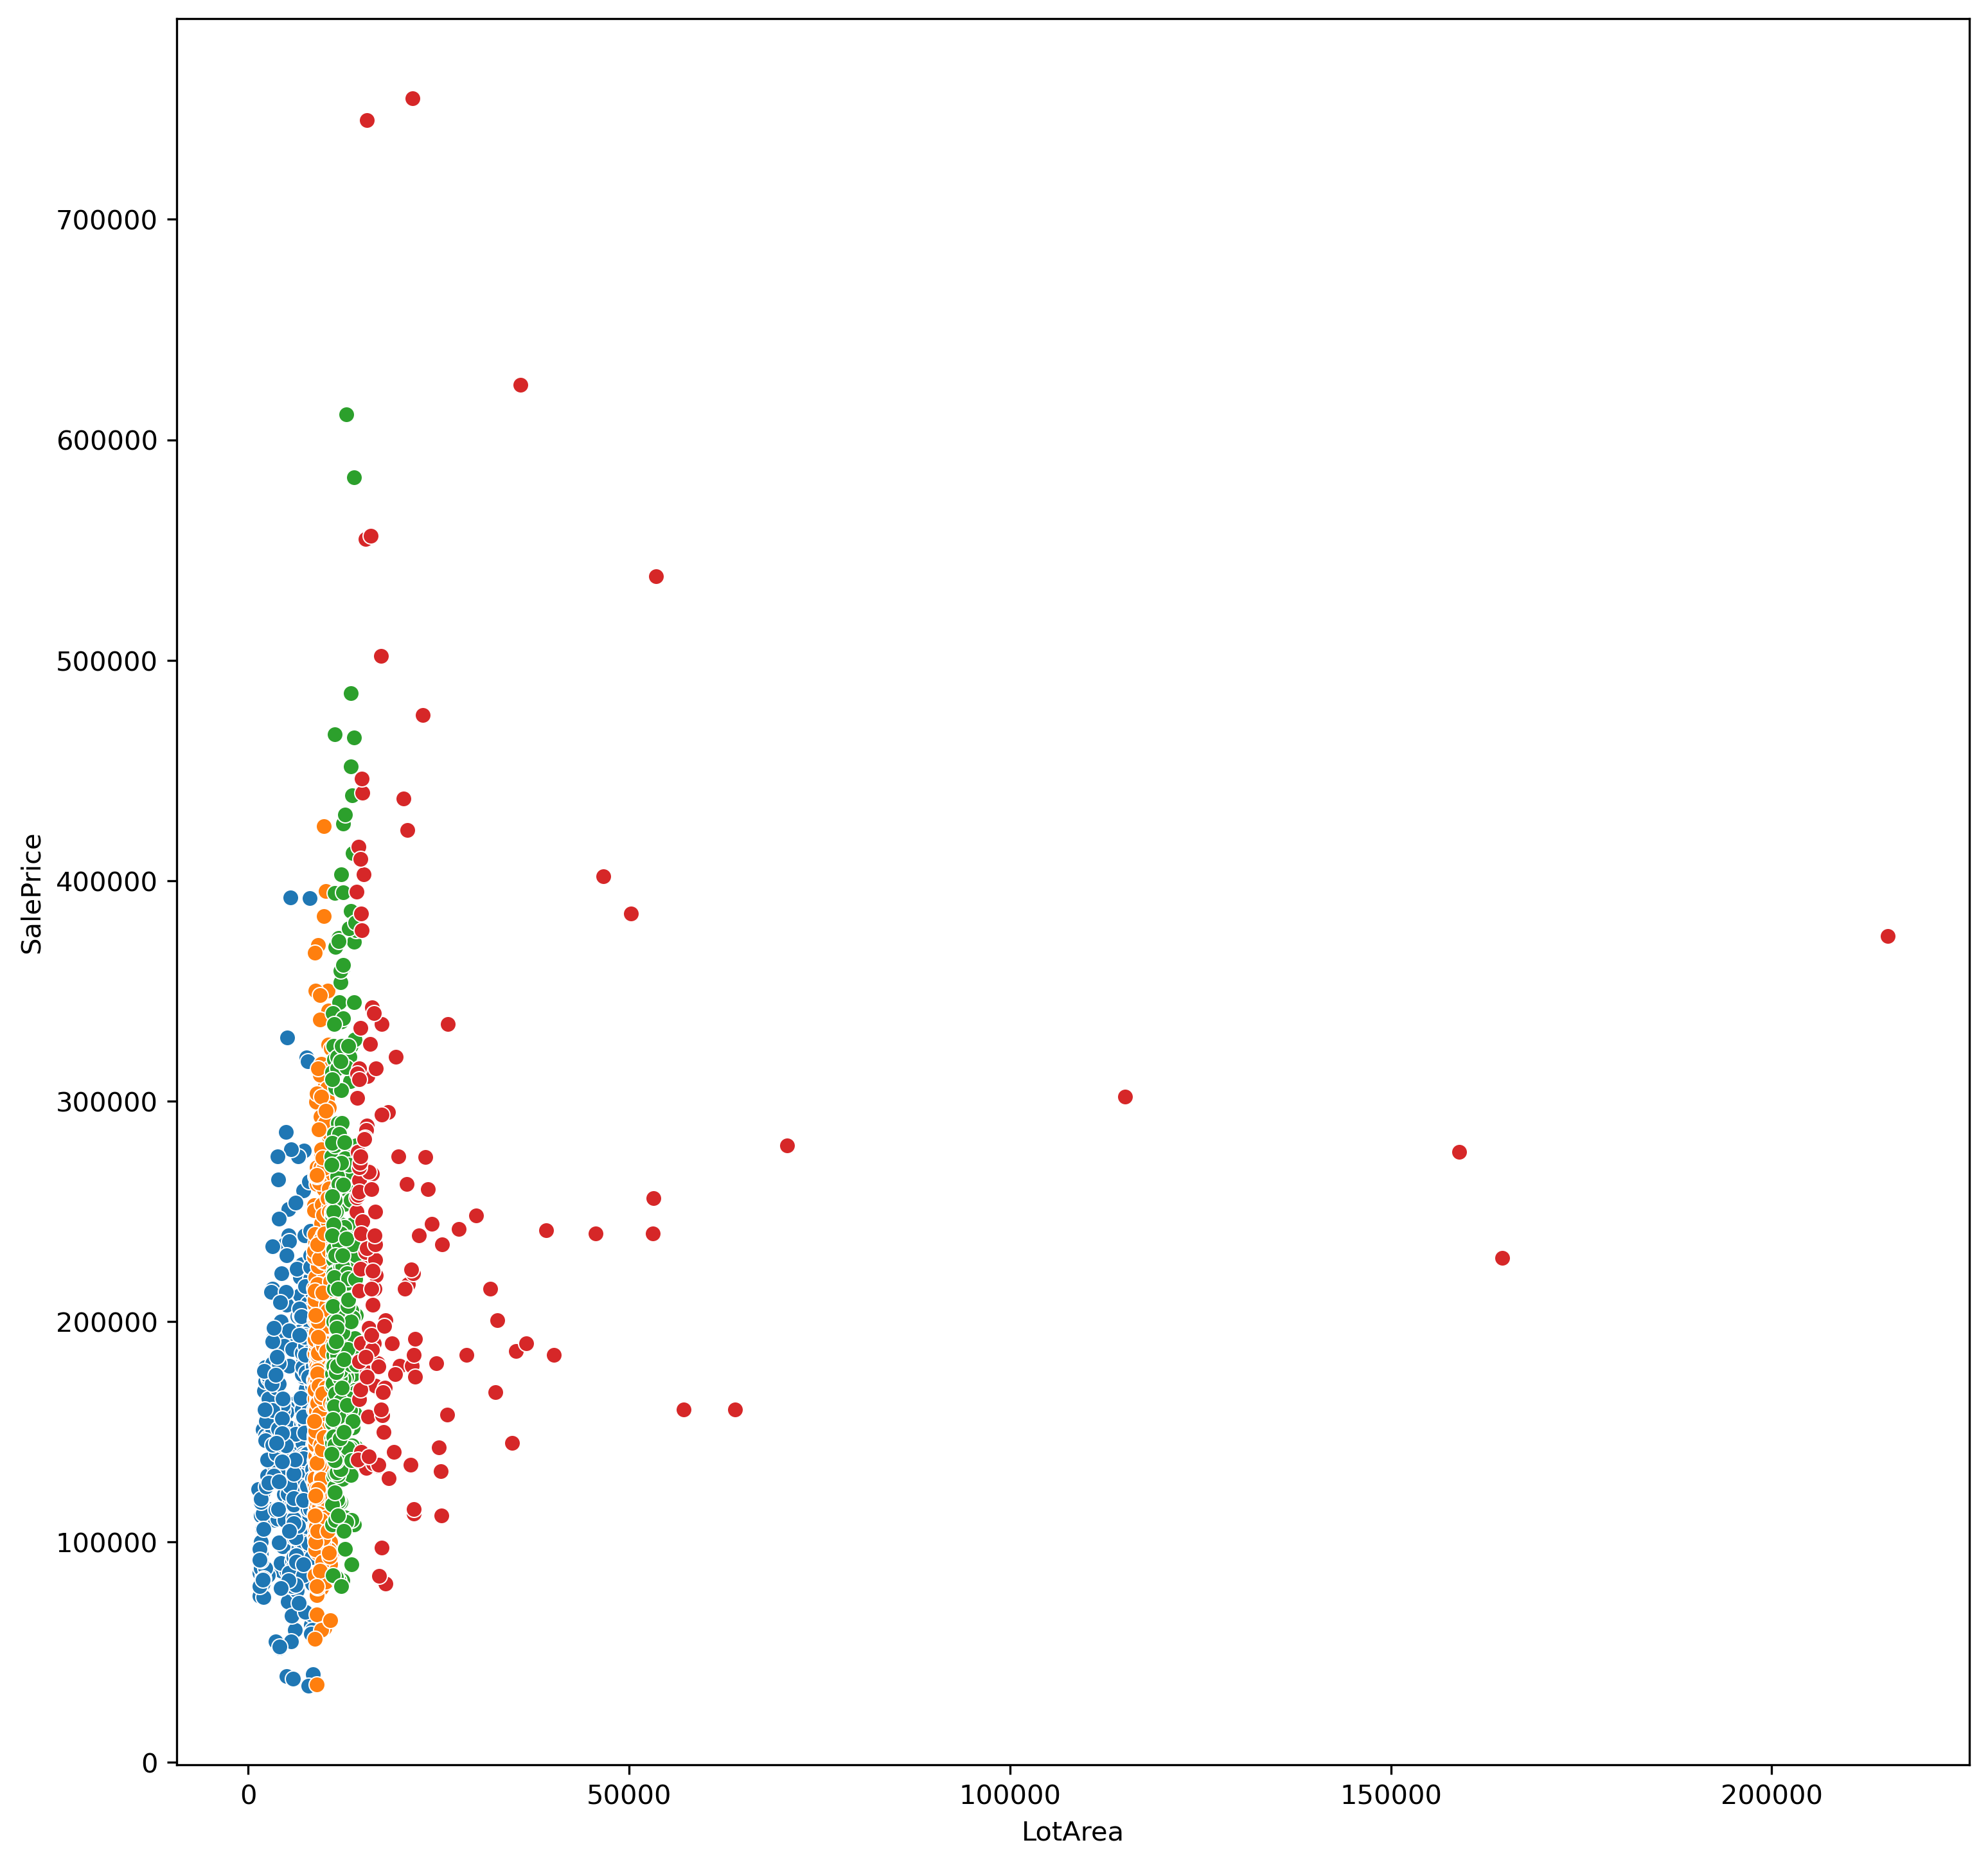

In [32]:
plt.figure(figsize=[12,12],dpi=300)
sns.scatterplot(x='LotArea',y='SalePrice',data=subset[subset.LotArea < 8618.2])
sns.scatterplot(x='LotArea',y='SalePrice',data=subset[(subset.LotArea >= 8618.2) & (subset.LotArea < 10923.6)])
sns.scatterplot(x='LotArea',y='SalePrice',data=subset[(subset.LotArea >= 10923.6) & (subset.LotArea < 14215.0)])
sns.scatterplot(x='LotArea',y='SalePrice',data=subset[subset.LotArea > 14215.0])
plt.show()

In [18]:
tree.keys()

dict_keys(['node', 'left', 'right'])

In [19]:
tree.values()

dict_values([10922.0, {'node': 8632.0, 'left': {'node': 7255.875, 'left': {'node': 5396.625, 'left': {'node': 2616.0, 'left': {'node': 2033.25, 'left': 98792.5925925926, 'right': 147014.2857142857}, 'right': {'node': 4029.5, 'left': {'node': 3322.5, 'left': 174007.6923076923, 'right': 156675.72727272726}, 'right': {'node': 4491.25, 'left': 140264.26666666666, 'right': 161427.79487179487}}}, 'right': {'node': 6090.25, 'left': {'node': 5577.125, 'left': 114575.55555555556, 'right': 118503.84210526316}, 'right': {'node': 6692.25, 'left': {'node': 6290.375, 'left': 126054.34782608696, 'right': 129686.84210526316}, 'right': {'node': 7090.875, 'left': 150309.38461538462, 'right': {'node': 7161.25, 'left': 143625.0, 'right': 129916.66666666667}}}}}, 'right': {'node': 8127.0, 'left': {'node': 7956.875, 'left': {'node': 7515.875, 'left': 165715.5172413793, 'right': {'node': 7797.5, 'left': 155804.83870967742, 'right': 148427.60606060605}}, 'right': 176361.55172413794}, 'right': {'node': 8471.12

In [13]:
pred_ = list()

def finder(data,d_tree):
    if data>d_tree['node']:
        if isinstance(d_tree['right'],dict):
            finder(data,d_tree['right'])
        else:
            pred_.append(d_tree['right'])
    else:
        if isinstance(d_tree['left'],dict):
            finder(data,d_tree['left'])
        else:
            pred_.append(d_tree['left'])

for point in test_x:
    finder(point,tree)

In [14]:
pred_

[130842.30769230769,
 229147.78787878787,
 147913.92307692306,
 157995.45454545456,
 194125.96,
 96352.94117647059,
 259184.875,
 146605.88235294117,
 96352.94117647059,
 211296.5,
 119343.47826086957,
 183400.25806451612,
 211296.5,
 175914.2857142857,
 173138.68421052632,
 147913.92307692306,
 130842.30769230769,
 124840.0,
 130842.30769230769,
 198209.73913043478,
 256216.92857142858,
 147913.92307692306,
 190032.4090909091,
 110371.42857142857,
 147913.92307692306,
 149108.82352941178,
 147913.92307692306,
 211296.5,
 166673.91304347827,
 131102.63157894736,
 160445.0,
 198209.73913043478,
 211296.5,
 151480.88,
 256216.92857142858,
 192356.25,
 126823.80952380953,
 130842.30769230769,
 258001.41176470587,
 194125.96,
 119343.47826086957,
 147913.92307692306,
 181676.92307692306,
 194125.96,
 183400.25806451612,
 183400.25806451612,
 149108.82352941178,
 149108.82352941178,
 256216.92857142858,
 213757.33333333334,
 126823.80952380953,
 181676.92307692306,
 175115.7894736842,
 2591

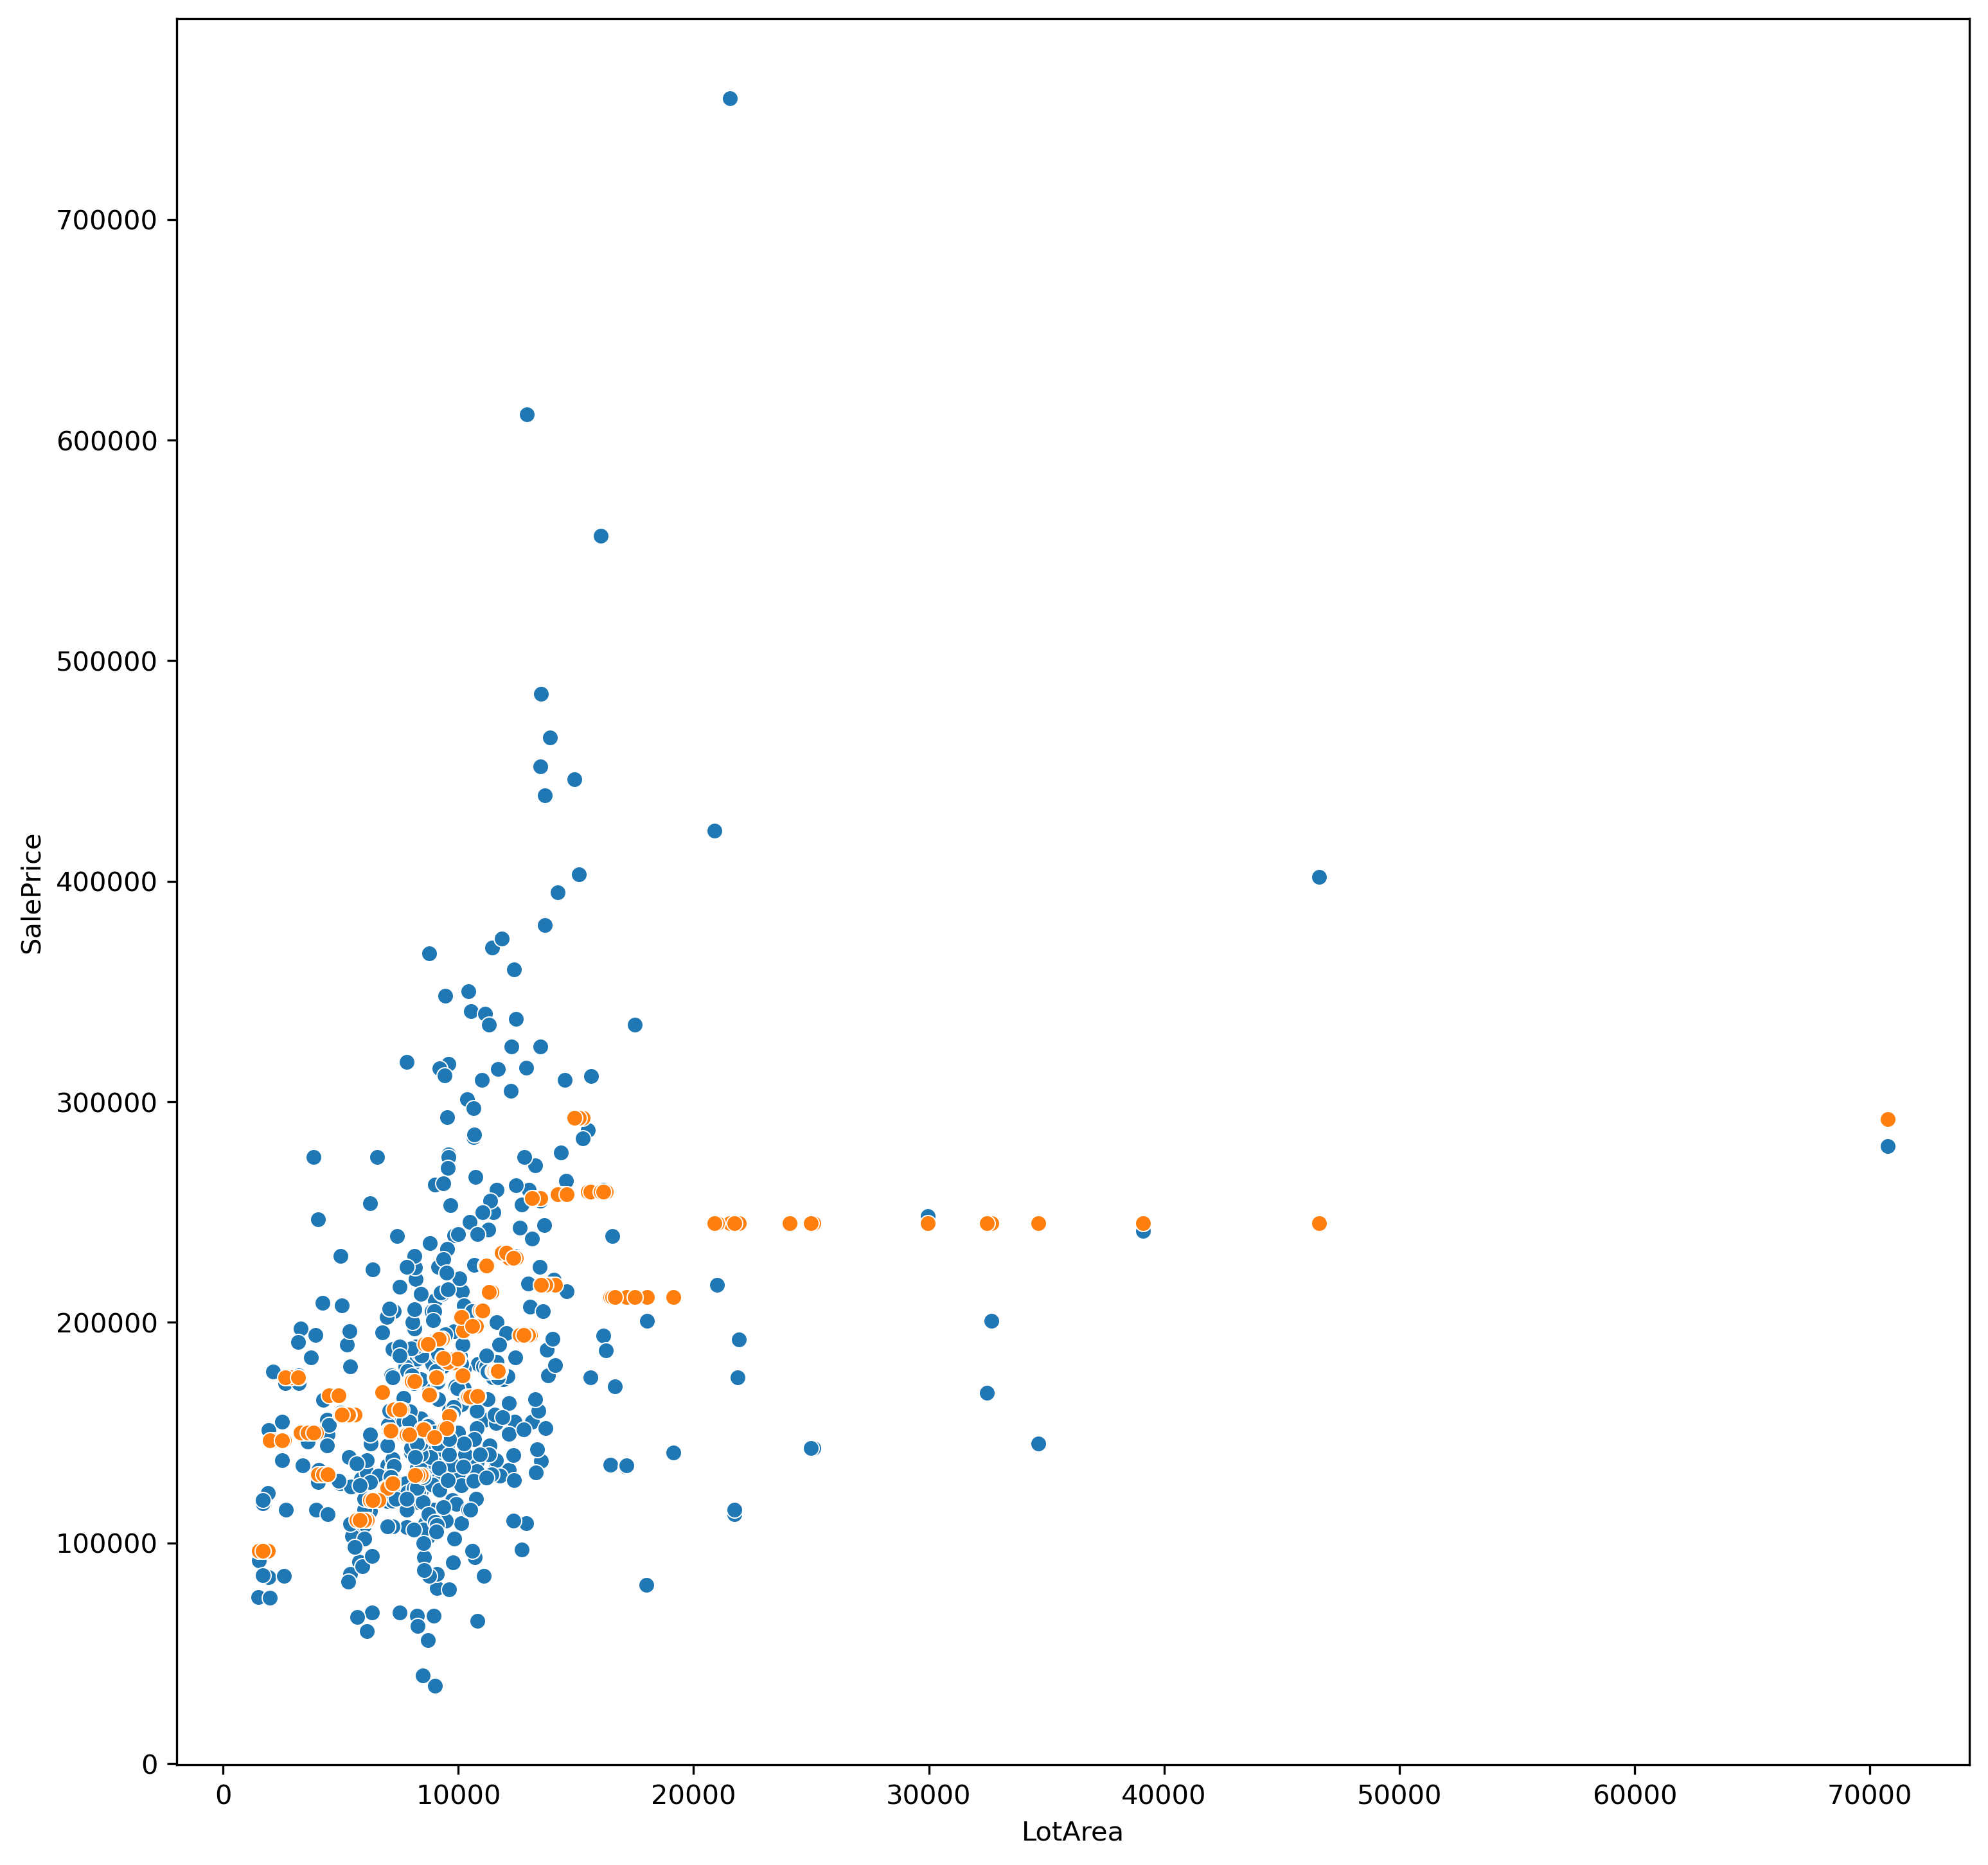

In [15]:
plt.figure(figsize=[12,12],dpi=300)
sns.scatterplot(x=test_x,y=test_y)
sns.scatterplot(x=test_x,y=pred_)
plt.show()

In [16]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2_score(test_y,pred_)*100,mean_squared_error(test_y,pred_),mean_absolute_error(test_y,pred_)

(19.05835652843284, 5648183773.091165, 52914.009530232885)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.asarray(train_x).reshape(-1,1),train_y)
model.score(np.asarray(test_x).reshape(-1,1),test_y)

In [42]:
import plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go

In [51]:
train_l = train[train['GrLivArea']<1486.5]
train_m = train[(train['GrLivArea']>=1486.5) & (train['GrLivArea']<2142.5)]
train_r = train[train['GrLivArea']>=2142.5]

trace1 = go.Scatter3d(x=train_l['LotArea'],
                      y=train_l['GrLivArea'],
                      z=train_l['SalePrice'],
                      mode='markers',
                      marker={'color':'#3D6AF2',
                              'size':12,
                              'line':{'color':'rgba(217, 217, 217, 0.14)',
                                      'width':0.5},
                              'opacity':0.8
                              })
trace2 = go.Scatter3d(x=train_m['LotArea'],
                      y=train_m['GrLivArea'],
                      z=train_m['SalePrice'],
                      mode='markers',
                      marker={'color':'#02732A',
                              'size':12,
                              'line':{'color':'rgba(217, 217, 217, 0.14)',
                                      'width':0.5},
                              'opacity':0.8
                              })
trace3 = go.Scatter3d(x=train_r['LotArea'],
                      y=train_r['GrLivArea'],
                      z=train_r['SalePrice'],
                      mode='markers',
                      marker={'color':'#F2E205',
                              'size':12,
                              'line':{'color':'rgba(217, 217, 217, 0.14)',
                                      'width':0.5},
                              'opacity':0.8
                              })
graph = [trace1,trace2,trace3]
layout = go.Layout(scene={'xaxis':{'title':'lot area'},
                          'yaxis':{'title':'graded living area'},
                          'zaxis':{'title':'sale price'}
                          })
fig = go.Figure(data=graph,layout=layout)
plot(fig)

'temp-plot.html'